## Proyecto Análisis de Datos Tarea 5

## Tarea 5 - Algoritmo de Aprendizaje Regresión Lineal, Regresión Logística o Árboles de decisión
### Elaborado por: Jenny Bautista Vargas
### Grupo: 202016908_91 - UNAD - Análisis de datos 

## Seleccionar uno de los modelos de Aprendizaje Supervisado vistos 
en la Tarea 3 (Regresión Lineal, Regresión Logística o Árboles de 
decisión) y realizar los siguientes pasos: 

1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc. 
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario. 
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 
4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo. 
5. Entrenar 
el 
modelo 
• Cargar en GitHub el código del modelo diseñado 
https://github.com/ 
Para el desarrollo de la actividad tenga en cuenta que: 
configurando 
los 
diferentes 
hiperparámetros. 
6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc. 
7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo. 
8. Interpretar, analizar y documentar los resultados obtenidos 

In [108]:
#cargar las librerías necesarias

import numpy as np # calculo numerico y el análisis de datos
import pandas as pd # manejo y análisis de estructuras de datos
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # creación de graficos en dos dimensiones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [111]:
pip install pandas seaborn scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [115]:
#librerias de para implementar el modelo

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
data = pd.read_csv('C://Users//Dell//Documents//Titanic.csv') 

In [119]:
# 2. Verificar columnas iniciales
print("Columnas iniciales en el dataset:", data.columns)

Columnas iniciales en el dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


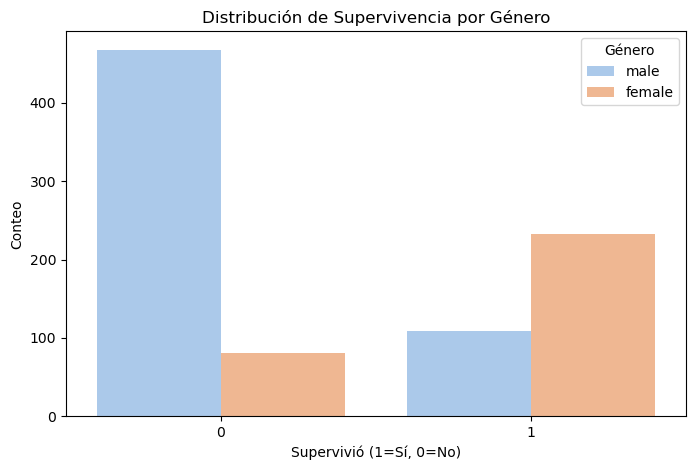

In [121]:
# 3. Análisis exploratorio
# Distribución de Supervivencia por género
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Survived', hue='Sex', palette='pastel')
plt.title('Distribución de Supervivencia por Género')
plt.xlabel('Supervivió (1=Sí, 0=No)')
plt.ylabel('Conteo')
plt.legend(title='Género')
plt.show()

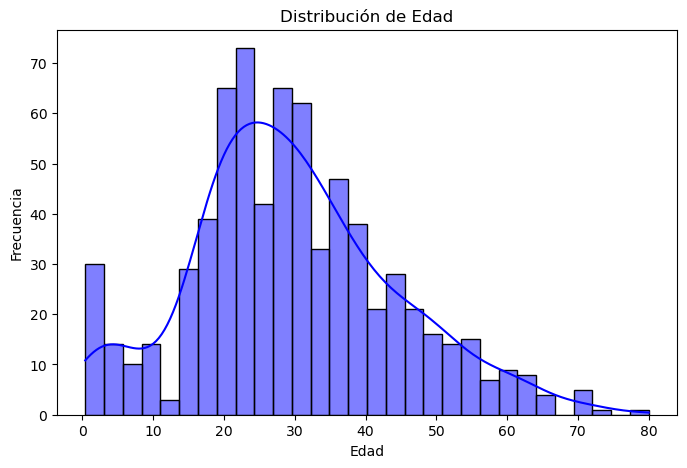

In [123]:
# Distribución de Edad
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Age', kde=True, bins=30, color='blue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [125]:
# 4. Preprocesamiento
# Eliminar columnas irrelevantes
data = data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], errors='ignore')

In [127]:
# Manejo de valores faltantes
if 'Age' in data.columns:
    data['Age'] = data['Age'].fillna(data['Age'].median())
else:
    print("La columna 'Age' no está en el DataFrame.")

if 'Embarked' in data.columns:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
else:
    print("La columna 'Embarked' no está en el DataFrame.")

# Codificación de variables categóricas
if 'Sex' in data.columns and 'Embarked' in data.columns:
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
else:
    print("Las columnas 'Sex' y/o 'Embarked' no están disponibles para codificación.")

In [129]:
# Verificar columnas después del preprocesamiento
print("Columnas después del preprocesamiento:", data.columns)

# Separar características y objetivo
X = data.drop(columns=['Survived'])
y = data['Survived']

Columnas después del preprocesamiento: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [131]:
# 5. Selección de características
selector = SelectKBest(score_func=chi2, k='all')
X_selected = selector.fit_transform(X, y)
selected_scores = selector.scores_
print("Puntajes de las características:", selected_scores)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)


Puntajes de las características: [3.08736994e+01 2.16491630e+01 2.58186538e+00 1.00974991e+01
 4.51831909e+03 9.27024470e+01 1.08467891e-02 5.48920482e+00]


In [137]:
# 6. Entrenar y evaluar modelos
# Regresión Logística
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("\nRegresión Logística:")
print(classification_report(y_test, y_pred_log))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log))


Regresión Logística:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Matriz de Confusión:
[[98 12]
 [23 46]]


In [139]:
# Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\nÁrbol de Decisión:")
print(classification_report(y_test, y_pred_tree))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_tree))


Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       110
           1       0.84      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.76       179
weighted avg       0.80      0.79      0.78       179

Matriz de Confusión:
[[103   7]
 [ 31  38]]


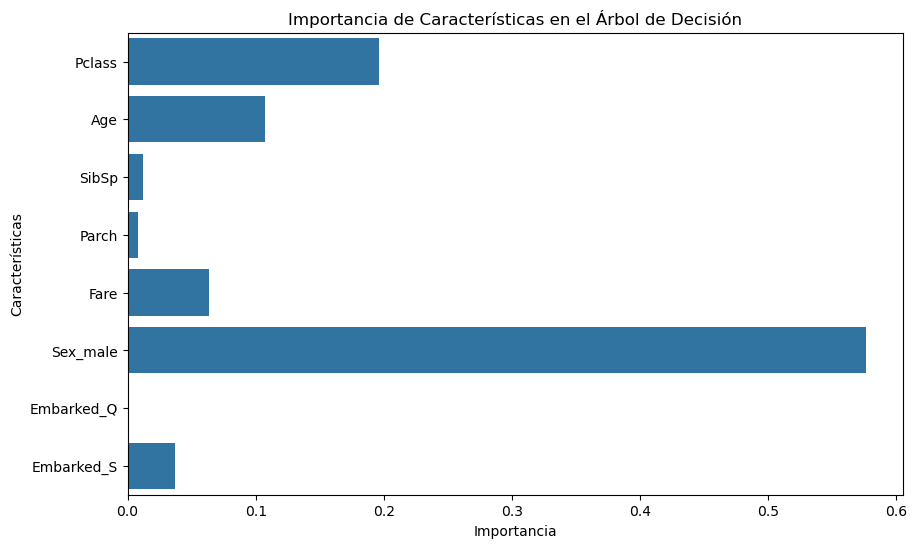

In [141]:
# 7. Visualización de importancia de características en el Árbol de Decisión
plt.figure(figsize=(10, 6))
sns.barplot(x=tree.feature_importances_, y=X.columns)
plt.title('Importancia de Características en el Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

## Preprocesamiento
Se eliminaron columnas irrelevantes como Name, Ticket, y Cabin, ya que no aportan directamente al análisis o eran difíciles de procesar (por ejemplo, datos textuales complejos).

Se imputaron valores faltantes en las columnas Age y Embarked usando la mediana y la moda, respectivamente.

Se codificaron las variables categóricas (Sex y Embarked) para convertirlas en una representación numérica adecuada para los modelos.